# Boyle's Law

Alvin He \
01/24/2023 \
Chemistry Honors 1°

### Introduction & methods

In order to find the volume of tubing and the number of moles of the gas, we can use Graphical analysis.

Before we do that, we need to get the equation for the volume of tubing: 

The volume of the entire system is equal to volume of the system + volume of the syringe, or 
$$V_{system} = V_{syringe} + V_{tubing}$$

Using the ideal gas law $PV = nRt$ and substituting the above relationship, we can get: 
$$\begin{align*}
P(V_{syringe} + V_{tubing}) &= nRt \\
V_{syringe} + V_{tubing} &= nRt * \frac{1}{P} \\
V_{syringe} &= nRt * \frac{1}{P} - V_{tubing}\\
\end{align*}$$

The equation resembles a linear equation $y = mx + b$ where $x = \frac{1}{P}$, $y = V_{syringe}$, $m = nRT$ and $b = -V_{tubing}$

The variables that are needed from the lab are: Biometric Pressure, Volume of Syringe and temperature.  

Using these experiment results, we can graph the x & y axis and the volume of tubing will be the y-intercept negated, and we can get the number of moles of the gas using the slope divided by the gas constant multiplied to the temperature, or $n = \frac{m}{Rt}$ 

### Results & Graphs

#### Data: 
Temperature: 20.1 ℃  

| $Pressure$ | $V_{syringe}$ |
| ---------- | ------------- |
| 100 kpa | 25 ml |
| 121 kpa | 20 ml |
| 151 kpa | 15 ml |
| 198 kpa | 10 ml |
| 290 kpa |  5 ml  |

#### Graphs:

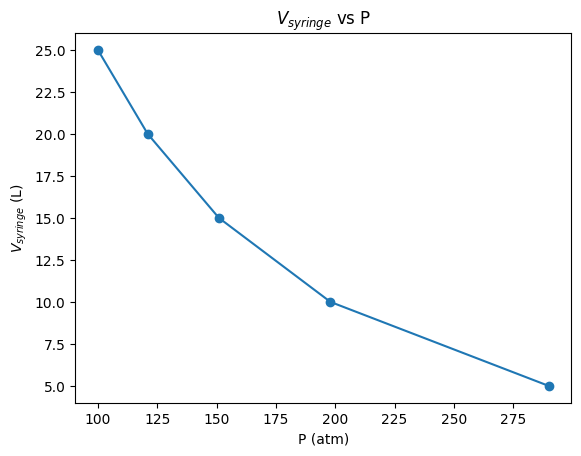

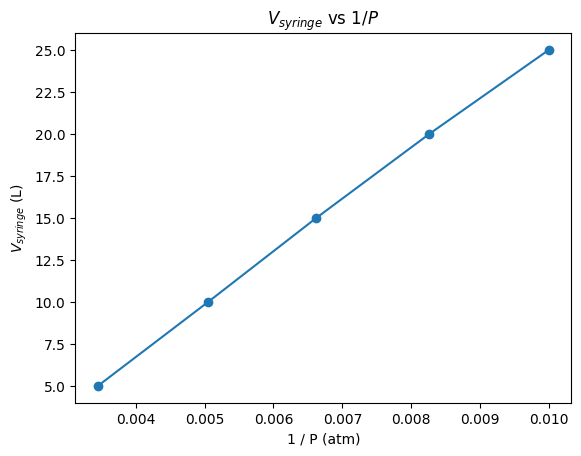

In [74]:
from sklearn.linear_model import LinearRegression # simple least squares, easier machine learning model to use
import matplotlib.pyplot as plt 
import numpy as np
from IPython.display import Markdown as md # allowing markdown to be written in python and use python variables 

temperature = 20.1

data = {
    "pressure": [100, 121, 151, 198, 290], 
    "V_syringe": [25, 20, 15, 10, 5]
}
# calculating 1 over pressure 
data["1 / pressure"] = []
for i in data["pressure"]: 
    data["1 / pressure"].append(1 / i)

# machine learning model for least squares analysis
def analyze(data2DArray):
    lr = LinearRegression()
    x = data2DArray['pressure'] 
    y = data2DArray['V_syringe'] 
    lr.fit(x, y)
    prediction = lr.predict(x)  # generate the line of best fit
    # slope(g/ml) rounded to 4 decimal places for accuracy
    slope = float(np.round(lr.coef_, 4)[0])
    return prediction, slope

# draw the scatter graph and the line of best fit
def graph(axis, data2DArray, predictOut):
    x = data2DArray['volume']
    axis.scatter(x, data2DArray['mass'])
    lineOfBestFit, = axis.plot(x, predictOut)
    return lineOfBestFit

# fg, axs = plt.subplots(2)
plt.figure()
ax = plt.gca()
ax.set_xlabel("P (atm)")
ax.set_ylabel("$V_{syringe}$ (L)")
ax.set_title("$V_{syringe}$ vs P")

ax.scatter(data["pressure"], data["V_syringe"])
pressureGraph = ax.plot(data["pressure"], data["V_syringe"])

plt.figure()
ax = plt.gca()
ax.set_xlabel("1 / P (atm)")
ax.set_ylabel("$V_{syringe}$ (L)")
ax.set_title("$V_{syringe}$ vs $1 / P$")

ax.scatter(data["1 / pressure"], data["V_syringe"])
oneOverPressureGraph = ax.plot(data["1 / pressure"], data["V_syringe"])
slope = (data["V_syringe"][0] - data["V_syringe"][1]) / (data["1 / pressure"][0] - data["1 / pressure"][1])
slope = np.round(slope, 3)
yIntercept = data["V_syringe"][0] - slope * data["1 / pressure"][0]
yIntercept = np.round(yIntercept, 3)
# _ = ax.legend(oneOverPressureGraph, ["Equation: $y = %sx + %s$" % (slope, yIntercept)])



In [73]:
md('''
### Calculations for # of moles of gas and $V_{tubing}$
Equation for Graph: $y = %sx %s$  
$Slope (L atm) = nRt$ 

so $$\\begin{align*} 
n &= \\frac{slope}{Rt} \\\\
n &= %s L atm \\  / \\  \\frac{0.0821 L atm}{1 mol K} * %s K  \\\\
n &= %s L atm * \\frac {1 mol}{%s L atm} \\\\
n &= %s mol
\\end{align*}$$
**There're 120.0 mols of gas**

$Y-Intercept (L) = %s$
$V_{tubing} = -(Y-Intercept)

so
$$\\begin{align*} 
V_{tubing} &= -(%s L) \\\\ 
V_{tubing} &= %s L
\\end{align*}$$
**The volume of the tubing is %s L**
''' % (slope, yIntercept, slope, temperature + 273, slope, np.round(0.0821 * (temperature + 273), 3), np.round(slope / (0.0821 * (temperature + 273))), yIntercept, yIntercept, -yIntercept, -yIntercept))



### Calculations for # of moles of gas and $V_{tubing}$
Equation for Graph: $y = 2880.952x -3.81$  
$Slope (L atm) = nRt$ 

so $$\begin{align*} 
n &= \frac{slope}{Rt} \\
n &= 2880.952 L atm \  / \  \frac{0.0821 L atm}{1 mol K} * 293.1 K  \\
n &= 2880.952 L atm * \frac {1 mol}{24.064 L atm} \\
n &= 120.0 mol
\end{align*}$$
**There're 120.0 mols of gas**

$Y-Intercept (L) = -3.81$
$V_{tubing} = -(Y-Intercept)

so
$$\begin{align*} 
V_{tubing} &= -(-3.81 L) \\ 
V_{tubing} &= 3.81 L
\end{align*}$$
**The volume of the tubing is 3.81 L**


### Discussion: Is the experimental data consistent with Boyle's law?

Yes, Boyle's law describes a decreasing function of pressure and volume, which is clearly described in the $V_{syringe}$ vs P graph, where a decrease in volume would lead to an increase in pressure and vise versa. The second graph of $V_{syringe}\ vs\ 1 / P$ also follows the Boyle's law, which also tell us that if there's no leaks and the temperature do not change, $PV = K$, K representing nRt which is now a constant if Boyle's law is followed. After simplifying the equation, we get something that resembles a linear relationship: $V = \frac{1}{p}K + 0$ which was represented by the second graph as a straight line, meaning that the data was consistent with Boyle's law.   

### NGSS Standards Met

1. Analyzing and Interpreting Data
    - Analyzed data and used graphical analysis to calculate the final results. 
2. Engaging in Argument from Evidence
    - Explained and argued how the experimental data followed the relationship stated by the Boyle's law. 


#### Note: 
- To see more of the code/the ipynb file, please view github: https://github.com/Alvin-He/jupyter-notebooks/blob/main/Chem%20Honors/Boyles%27s%20law/boylesLaw.ipynb